<a href="https://colab.research.google.com/github/sidhart/Datascience/blob/main/Data_Munging_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives



This notebook contains


* How to “clean” a dataset, ready for use in statistical analysis

* use Python libraries like Pandas, Numpy, and Matplotlib to perform the  data-preprocessing steps

* obtain probability and statistics based insights from the data


## Dataset

The dataset chosen for this experiment is the **Play Store** dataset which is  publicly available and created with this [methodology](https://nycdatascience.com/blog/student-works/google-play-store-everything-that-you-need-to-know-about-the-android-market/)  

This dataset consists of 10841 records. Each record is made up of 13 fields.

**For example**, Each record consists of App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver.

## Problem Statement

Before we can derive any meaningful insights from the Play Store data, it is essential to pre-process the data and make it suitable for further analysis. This pre-processing step forms a major part of data wrangling (or data munging) and ensures better quality data. It consists of the transformation and mapping of data from a "raw" data form into another format so that it is more valuable for a variety of downstream purposes such as analytics. Data analysts typically spend a sizeable amount of time in the process of data wrangling, compared to the actual analysis of the data.

After data munging is performed, several actionable insights can be derived from the Play Store apps data. Such insights could help to unlock the enormous potential to drive app-making businesses to success.

In [82]:
#@title Download the data
#!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/googleplaystore.csv

#### Import required packages

In [83]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import regex as re

#### Load the dataset

In [84]:
df = pd.read_csv("googleplaystore.csv")

In [85]:
df.shape

(10841, 13)

In [86]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [90]:
# check data types
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Pre-processing

### Task 1: Data Cleaning

* Check whether there are any null values and figure out how you want to handle them?
  
    **Hint:** isnan(), dropna(), fillna()
* If there is any duplication of a record, how would you like to handle it?

    Hint: [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Are there any non-English apps? And how to filter them?

* In the size column, multiply 1,000,000 with M in the cell and multiply by 1000 if we have K in the cell.

In [91]:
# check if any null values exist
df.isnull().values.any()

True

In [92]:
# check columns with null values
missing_val_cols = {}
for i in df.columns:
    cnt_null = sum(df[i].isnull())
    if cnt_null > 0:
        missing_val_cols[i]= cnt_null
missing_val_cols

{'Rating': 1474,
 'Type': 1,
 'Content Rating': 1,
 'Current Ver': 8,
 'Android Ver': 3}

<Axes: xlabel='Rating'>

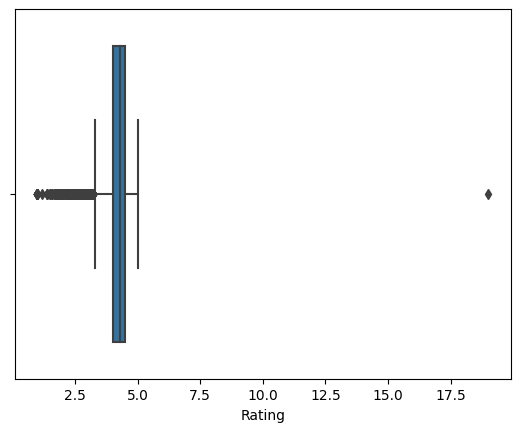

In [93]:
# plot Rating
sns.boxplot(x=df["Rating"])

In [94]:
#df.groupby('Rating',dropna=False).size()

In [95]:
# drop row with Rating = 19 as it is an outlier
df = df[~(df['Rating']==19)]
print(df.shape)

(10840, 13)


In [96]:
# check if any duplicates records exist
duplicate = df[df.duplicated()]
print("No.of duplicates : "+ str(duplicate.shape[0]))

No.of duplicates : 483


In [97]:
# check duplicates by App
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [98]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [99]:
# sort dataframe in ascending by App and reviews
df = df.sort_values(['App','Reviews'], ascending=[False, False])

In [100]:
# drop duplicates by App
df_dedup = df.drop_duplicates('App')
print(df_dedup.shape[0])

9659


In [101]:
# check category level rating avg
df_dedup.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.359322
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.358879
ENTERTAINMENT          4.129885
EVENTS                 4.435556
FAMILY                 4.183525
FINANCE                4.115563
FOOD_AND_DRINK         4.171277
GAME                   4.243527
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.140984
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230556
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039917
TRAVEL_AND_LOCAL       4.069519

In [102]:
## Add Category level rating avg to dataframe
df_dedup['Category_Rating_Avg'] = df_dedup.groupby('Category')['Rating'].transform('mean')

<ipython-input-102-3aeea804f6a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup['Category_Rating_Avg'] = df_dedup.groupby('Category')['Rating'].transform('mean')


In [103]:
df_dedup.loc[:,['Category','Rating','Category_Rating_Avg']].head(5)

,Category,Rating,Category_Rating_Avg
882,ENTERTAINMENT,4.7,4.129885
7559,TOOLS,4.0,4.039917
2575,SOCIAL,4.6,4.247291
4362,LIFESTYLE,3.8,4.093355
6334,VIDEO_PLAYERS,NaN,4.044966


In [104]:
# Impute null values in Rating with mean value of each category
df_dedup['Rating'] = df_dedup['Rating'].fillna(df_dedup['Category_Rating_Avg'])

<ipython-input-104-e4412af8cba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup['Rating'] = df_dedup['Rating'].fillna(df_dedup['Category_Rating_Avg'])


In [105]:
# check if imputation worked
df_dedup.loc[:,['Category','Rating','Category_Rating_Avg']]

,Category,Rating,Category_Rating_Avg
882,ENTERTAINMENT,4.700000,4.129885
7559,TOOLS,4.000000,4.039917
2575,SOCIAL,4.600000,4.247291
4362,LIFESTYLE,3.800000,4.093355
6334,VIDEO_PLAYERS,4.044966,4.044966
...,...,...,...
4636,COMMUNICATION,4.700000,4.121484
4541,TOOLS,4.500000,4.039917
324,COMICS,3.500000,4.181481
8532,SOCIAL,4.500000,4.247291


In [106]:
# drop rows with missing values as number of rows is small for remaining missing value columns
df_dedup = df_dedup.dropna()

In [107]:
df_dedup.shape[0]

9648

In [108]:
# check if any null values exist
df_dedup.isnull().values.any()

False

In [109]:
# convert M and K values in size column (approach 1)
def convert_size(s):
    s = s.upper()
    if "M" in s:
        return float(s.replace("M",""))*1000000
    elif "K" in s:
        return float(s.replace("K",""))*1000
    else:
        return s

In [110]:
# replace size with converted values
df_dedup['Size'] = df_dedup['Size'].apply(convert_size)

<ipython-input-110-25566f7a0183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup['Size'] = df_dedup['Size'].apply(convert_size)


In [111]:
# get count of alphabets in App using isalpha
#def count_alphabets(s):
#    return(sum(1 for c in s if c.isalpha()))

In [112]:
# check if any app name has no english alphabets at all
#print(any(e == 0 for e in df_dedup['App'].apply(count_alphabets)))

In [113]:
# get percentage of non-english chars(unicode > 127) in a string
def get_spl_char_ratio(s):
    spl_char_count = sum(1 for c in s if ord(c)>127)
    return (spl_char_count/len(s))

In [114]:
# get percentage of non-english characters in app name
df_dedup['non_en_char_perc'] = df_dedup["App"].apply(get_spl_char_ratio)

<ipython-input-114-b3f36ddde5ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup['non_en_char_perc'] = df_dedup["App"].apply(get_spl_char_ratio)


In [115]:
# check non-english characters app names
df_dedup.loc[:,['App','non_en_char_perc']].sort_values(by='non_en_char_perc',ascending=False).head(10)

,App,non_en_char_perc
3750,РИА Новости,0.909091
6418,あなカレ【BL】無料ゲーム,0.846154
6406,BL 女性向け恋愛ゲーム◆俺プリクロス,0.842105
6417,BL 女性向け恋愛ゲーム◆ごくメン,0.823529
9308,أحداث وحقائق | خبر عاجل في اخبار العالم,0.794872
10763,FP Разбитый дисплей,0.789474
9248,ECナビ×シュフー,0.777778
9466,パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）,0.741935
9211,RPG ブレイジング ソウルズ アクセレイト,0.727273
5513,中国語 AQリスニング,0.727273


In [116]:
df_group = df_dedup.groupby('non_en_char_perc')['App'].count().reset_index()
df_group['non_en_char_perc'] = np.round(df_group['non_en_char_perc']*100,0)
df_group.rename(columns = {'App':'count'}, inplace = True)

In [117]:
binnedValue = pd.qcut(df_group['non_en_char_perc'],10,duplicates='drop')
binnedValue.name = 'non_en_char_perc'+'_binned'
df_group = pd.concat([df_group, binnedValue], axis=1)

In [118]:
df_group['non_en_char_perc_binned'] = df_group['non_en_char_perc_binned'].cat.add_categories('0')
df_group.iloc[0,2]='0'

In [119]:
df_group.groupby('non_en_char_perc_binned').agg({'count':'sum'}).reset_index()

,non_en_char_perc_binned,count
0,"(-0.001, 2.0]",81
1,"(2.0, 3.0]",88
2,"(3.0, 4.0]",114
3,"(4.0, 6.0]",86
4,"(6.0, 9.0]",67
5,"(9.0, 13.0]",37
6,"(13.0, 20.5]",25
7,"(20.5, 46.0]",16
8,"(46.0, 70.0]",15
9,"(70.0, 91.0]",13


In [120]:
# check app names with < 10% special chars
df_dedup.loc[:,['App','non_en_char_perc']][df_dedup['non_en_char_perc']< 0.1].sort_values(by='non_en_char_perc',ascending=False)

,App,non_en_char_perc
7187,РееI Smart Remote MP3 CD Player,0.096774
10525,FK Sūduva Marijampolė,0.095238
5838,Ay Yıldız Analog Saat,0.095238
4608,T-Mobile® FamilyMode™,0.095238
8392,Digoo·Cloud,0.090909
...,...,...
10275,Mobile FC,0.000000
10723,Mobile Kick,0.000000
5417,Mobile Legends: Bang Bang,0.000000
4221,Mobile Number Tracker,0.000000


In [121]:
# filtering for only english app names (filter only apps with less than 10% special characters)
df_clean = df_dedup[df_dedup['non_en_char_perc']<0.1]

In [122]:
print(df_clean.shape[0])

9546


## Visualization

### Task 2: Perform the  following tasks:

##### Exercise 1: Find the number of apps in various categories by using an appropriate plot.

In [123]:
# calculate no.of apps by category
df_groups = df_clean.groupby(['Category'])['App'].count().reset_index(name='count').sort_values(['count'], ascending=False)
df_groups.head(5)

,Category,count
11,FAMILY,1844
14,GAME,931
29,TOOLS,823
4,BUSINESS,418
20,MEDICAL,394


In [124]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

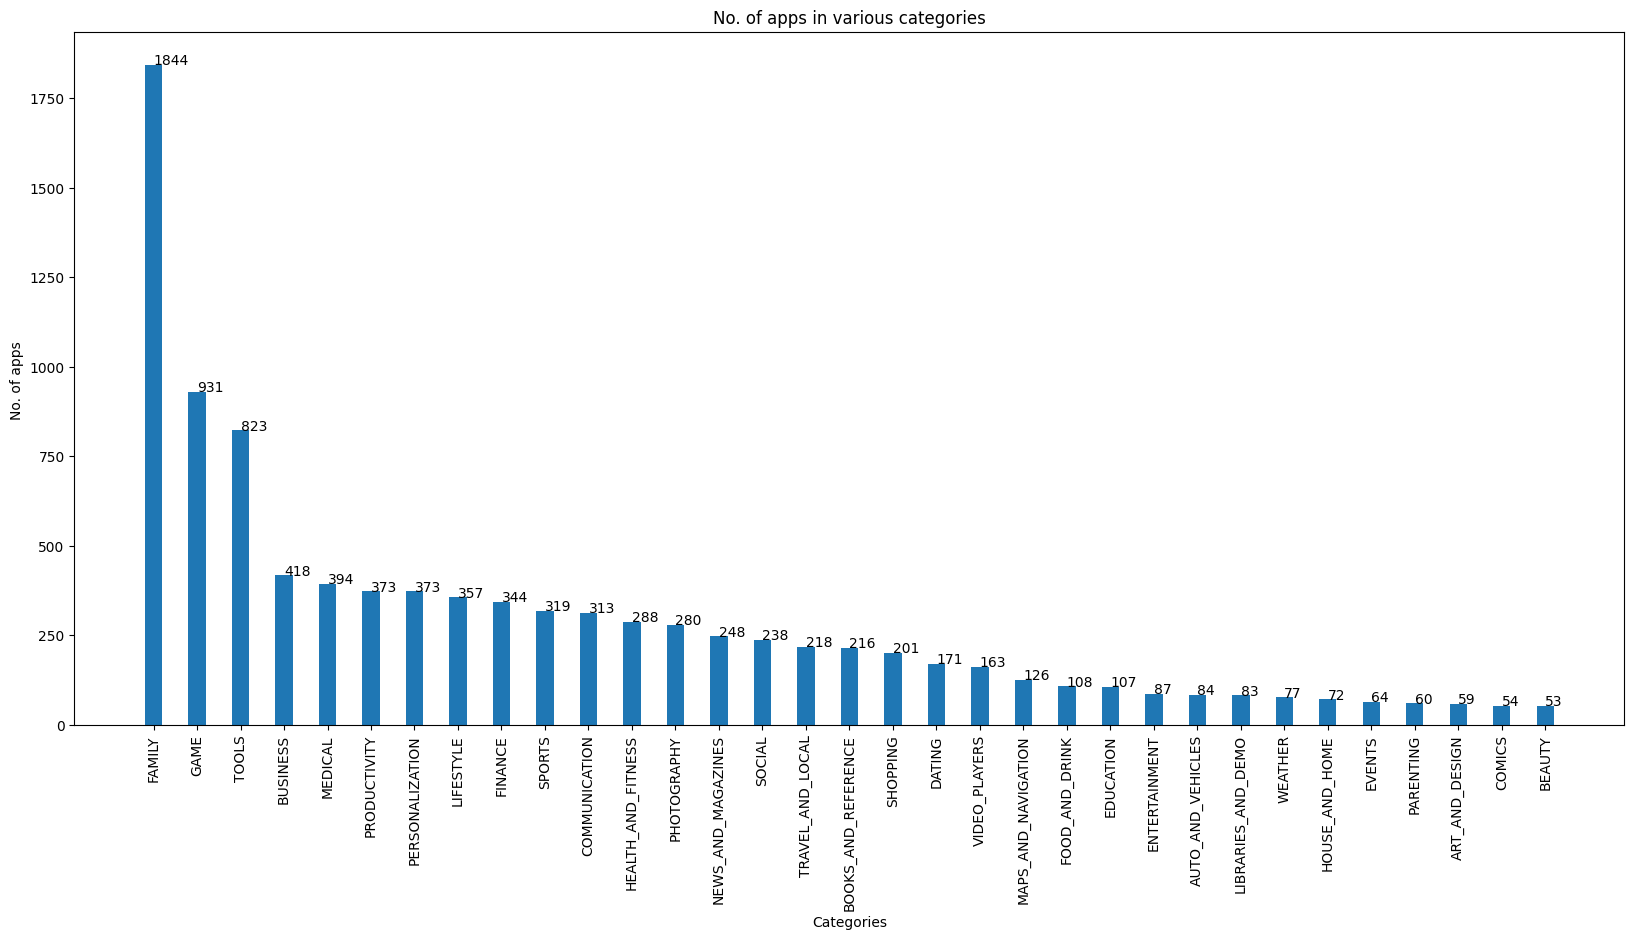

In [125]:
# create x and y axis values
categories_1 =list(df_groups['Category'])
app_counts = list(df_groups['count'])
# creating the bar plot
fig = plt.figure(figsize = (20,9))
plt.bar(categories_1, app_counts,width = 0.4)
addlabels(categories_1, app_counts)
plt.xlabel("Categories")
plt.ylabel("No. of apps ")
plt.title("No. of apps in various categories")
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'BUSINESS'),
  Text(4, 0, 'MEDICAL'),
  Text(5, 0, 'PRODUCTIVITY'),
  Text(6, 0, 'PERSONALIZATION'),
  Text(7, 0, 'LIFESTYLE'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'SPORTS'),
  Text(10, 0, 'COMMUNICATION'),
  Text(11, 0, 'HEALTH_AND_FITNESS'),
  Text(12, 0, 'PHOTOGRAPHY'),
  Text(13, 0, 'NEWS_AND_MAGAZINES'),
  Text(14, 0, 'SOCIAL'),
  Text(15, 0, 'TRAVEL_AND_LOCAL'),
  Text(16, 0, 'BOOKS_AND_REFERENCE'),
  Text(17, 0, 'SHOPPING'),
  Text(18, 0, 'DATING'),
  Text(19, 0, 'VIDEO_PLAYERS'),
  Text(20, 0, 'MAPS_AND_NAVIGATION'),
  Text(21, 0, 'FOOD_AND_DRINK'),
  Text(22, 0, 'EDUCATION'),
  Text(23, 0, 'ENTERTAINMENT'),
  Text(24, 0, 'AUTO_AND_VEHICLES'),
  Text(25, 0, 'LIBRARIES_AND_DEMO'),
  Text(26, 0, 'WEATHER'),
  Text(27, 0, 'HOUSE_AND_HOME'),
  Text(28,

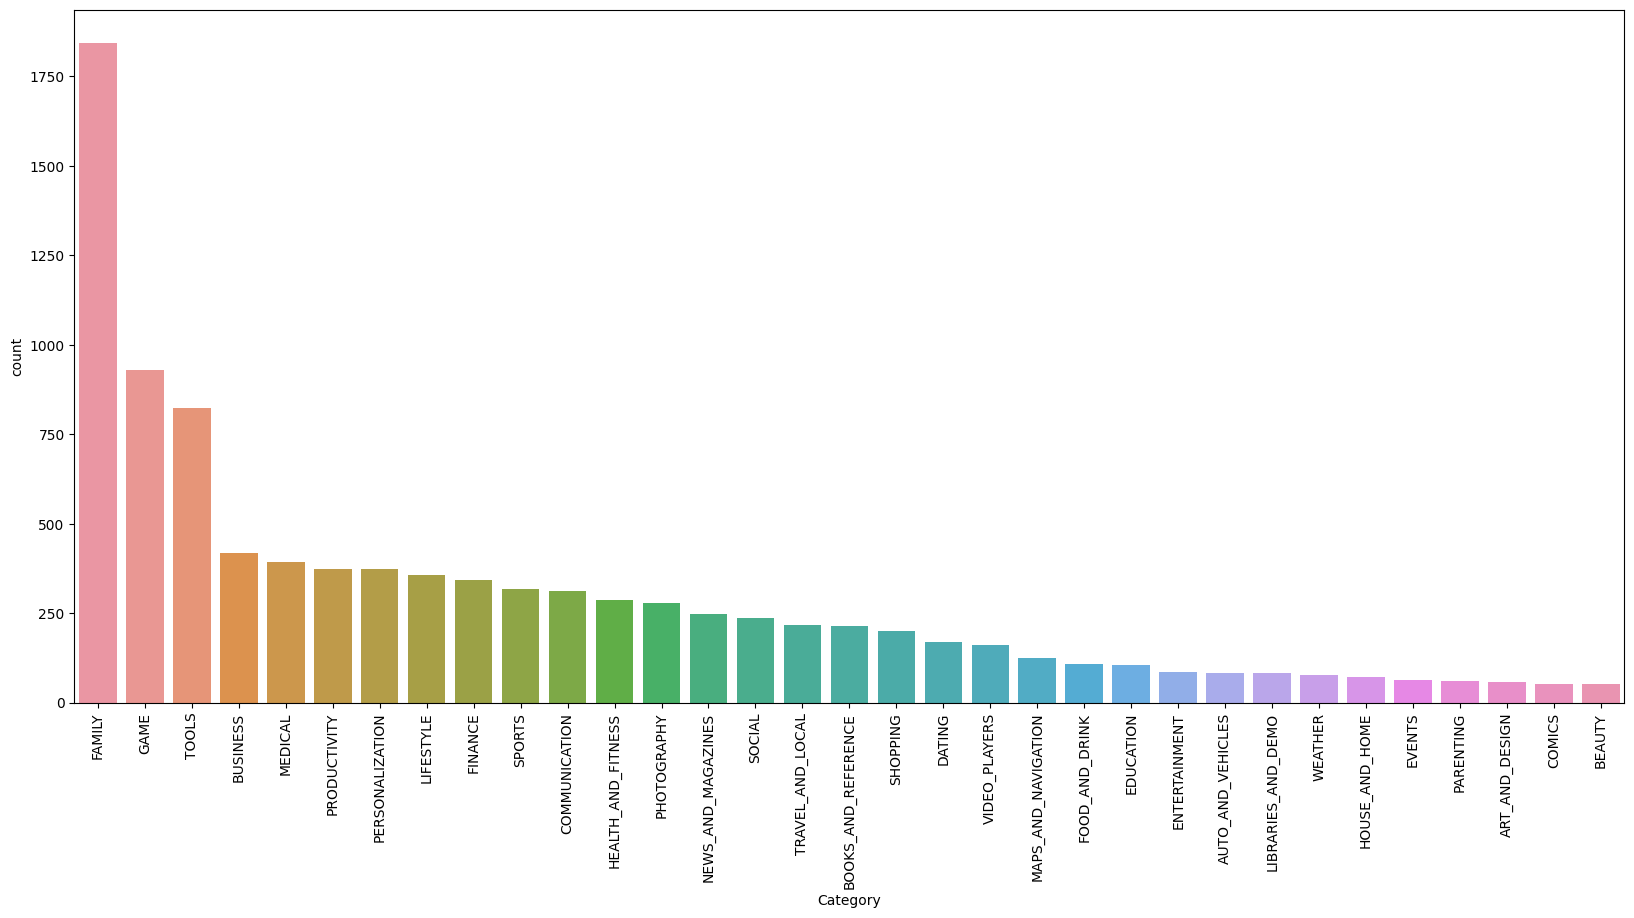

In [126]:
# visualize using seaborn
plt.figure(figsize = (20,9))
sns.barplot(df_groups,x='Category',y='count')
plt.xticks(rotation=90)

##### Exercise 2: Explore the distribution of free and paid apps across different categories

**Hint:** Stacked Bar Graph, [link](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html)

In [127]:
# prepare data for stacked bar plot
plotdata = df_clean.groupby(['Category', 'Type']).size().unstack().reset_index().fillna(0)
plotdata['Total_app_count'] = plotdata['Free']+plotdata['Paid']
plotdata = plotdata.sort_values(by='Total_app_count',ascending=False)
categories_2 = list(plotdata['Category'])
free_app_count = list(plotdata['Free'])
paid_app_count = list(plotdata['Paid'])

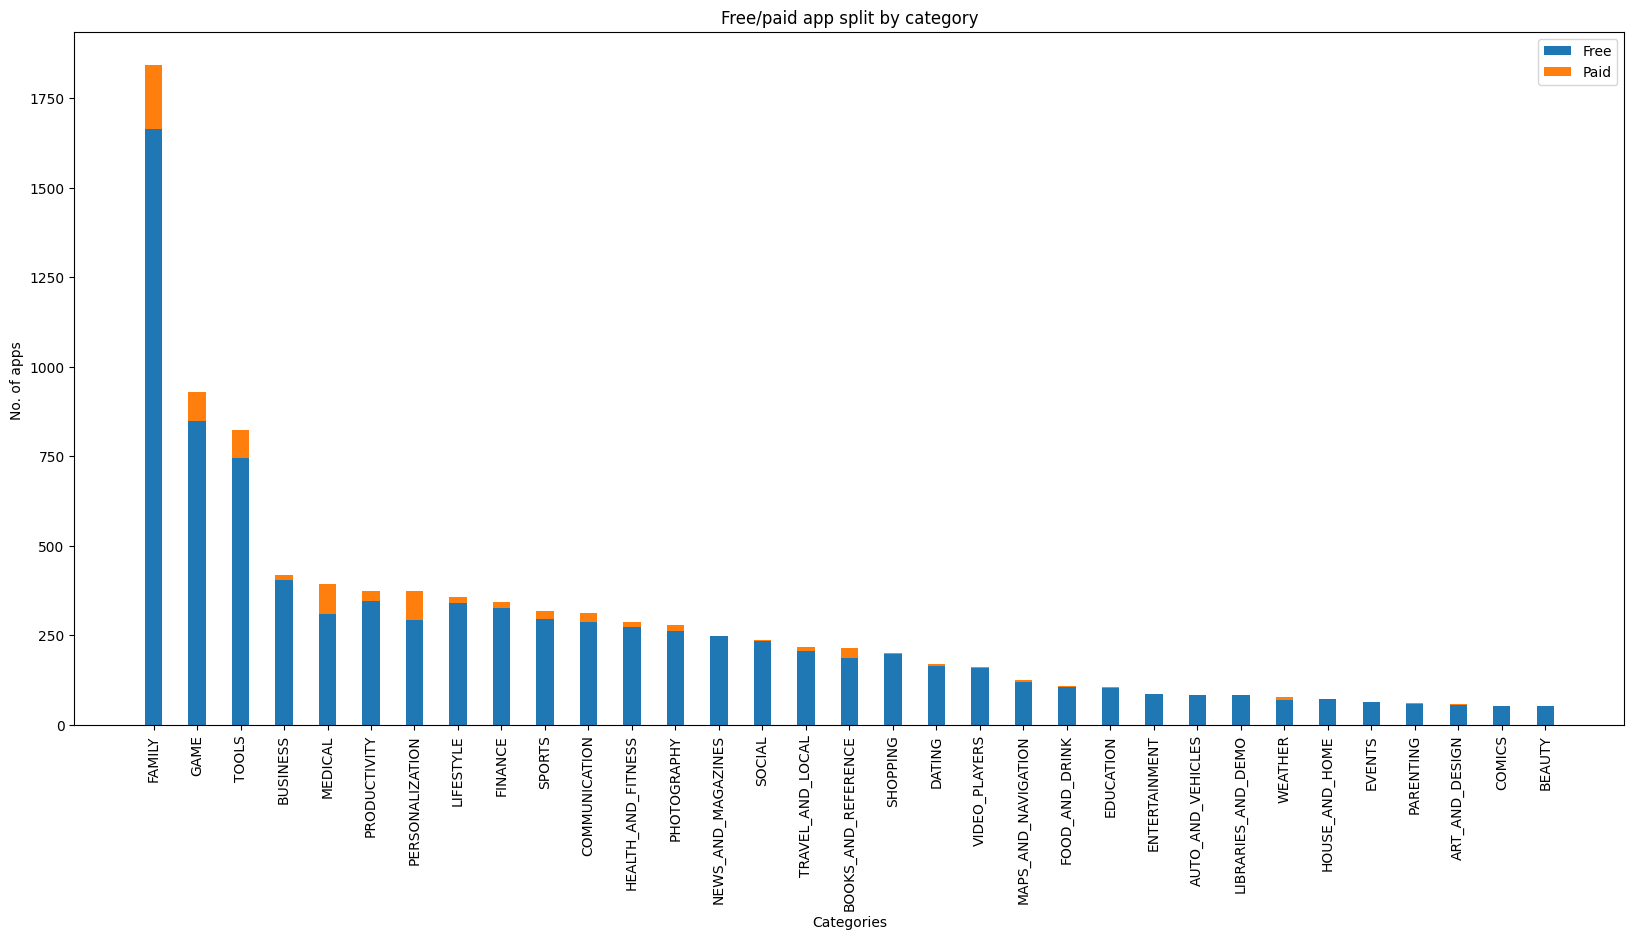

In [128]:
# plot stackedbar chart
width = 0.4
fig = plt.figure(figsize = (20,9))
p1=plt.bar(categories_2, free_app_count, width)
p2=plt.bar(categories_2, paid_app_count, width,bottom=free_app_count)
plt.xlabel("Categories")
plt.ylabel("No. of apps ")
plt.title("Free/paid app split by category")
plt.xticks(rotation=90)
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))
plt.show()

##### Exercise 3: Represent the distribution of app rating on a scale of 1-5 using an appropriate plot

**Hint:** histogram / strip plot

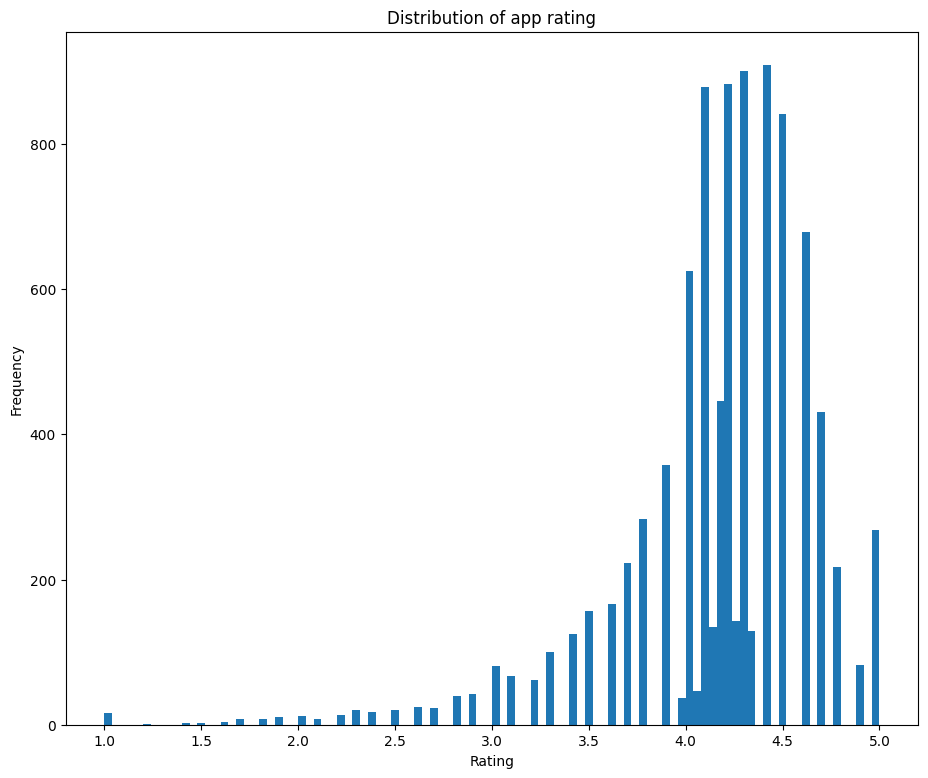

In [129]:
# plot histogram of ratings
fig = plt.figure(figsize = (11,9))
plt.hist(df_clean['Rating'],bins=100)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of app rating")
plt.show()


##### Exercise 4: Identify outliers of the rating column by plotting the boxplot category wise and handle them.

**Hint:** Removing outliers using Z-score, quantile [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

[Text(1, 0, 'ART_AND_DESIGN'),
 Text(2, 0, 'AUTO_AND_VEHICLES'),
 Text(3, 0, 'BEAUTY'),
 Text(4, 0, 'BOOKS_AND_REFERENCE'),
 Text(5, 0, 'BUSINESS'),
 Text(6, 0, 'COMICS'),
 Text(7, 0, 'COMMUNICATION'),
 Text(8, 0, 'DATING'),
 Text(9, 0, 'EDUCATION'),
 Text(10, 0, 'ENTERTAINMENT'),
 Text(11, 0, 'EVENTS'),
 Text(12, 0, 'FAMILY'),
 Text(13, 0, 'FINANCE'),
 Text(14, 0, 'FOOD_AND_DRINK'),
 Text(15, 0, 'GAME'),
 Text(16, 0, 'HEALTH_AND_FITNESS'),
 Text(17, 0, 'HOUSE_AND_HOME'),
 Text(18, 0, 'LIBRARIES_AND_DEMO'),
 Text(19, 0, 'LIFESTYLE'),
 Text(20, 0, 'MAPS_AND_NAVIGATION'),
 Text(21, 0, 'MEDICAL'),
 Text(22, 0, 'NEWS_AND_MAGAZINES'),
 Text(23, 0, 'PARENTING'),
 Text(24, 0, 'PERSONALIZATION'),
 Text(25, 0, 'PHOTOGRAPHY'),
 Text(26, 0, 'PRODUCTIVITY'),
 Text(27, 0, 'SHOPPING'),
 Text(28, 0, 'SOCIAL'),
 Text(29, 0, 'SPORTS'),
 Text(30, 0, 'TOOLS'),
 Text(31, 0, 'TRAVEL_AND_LOCAL'),
 Text(32, 0, 'VIDEO_PLAYERS'),
 Text(33, 0, 'WEATHER')]

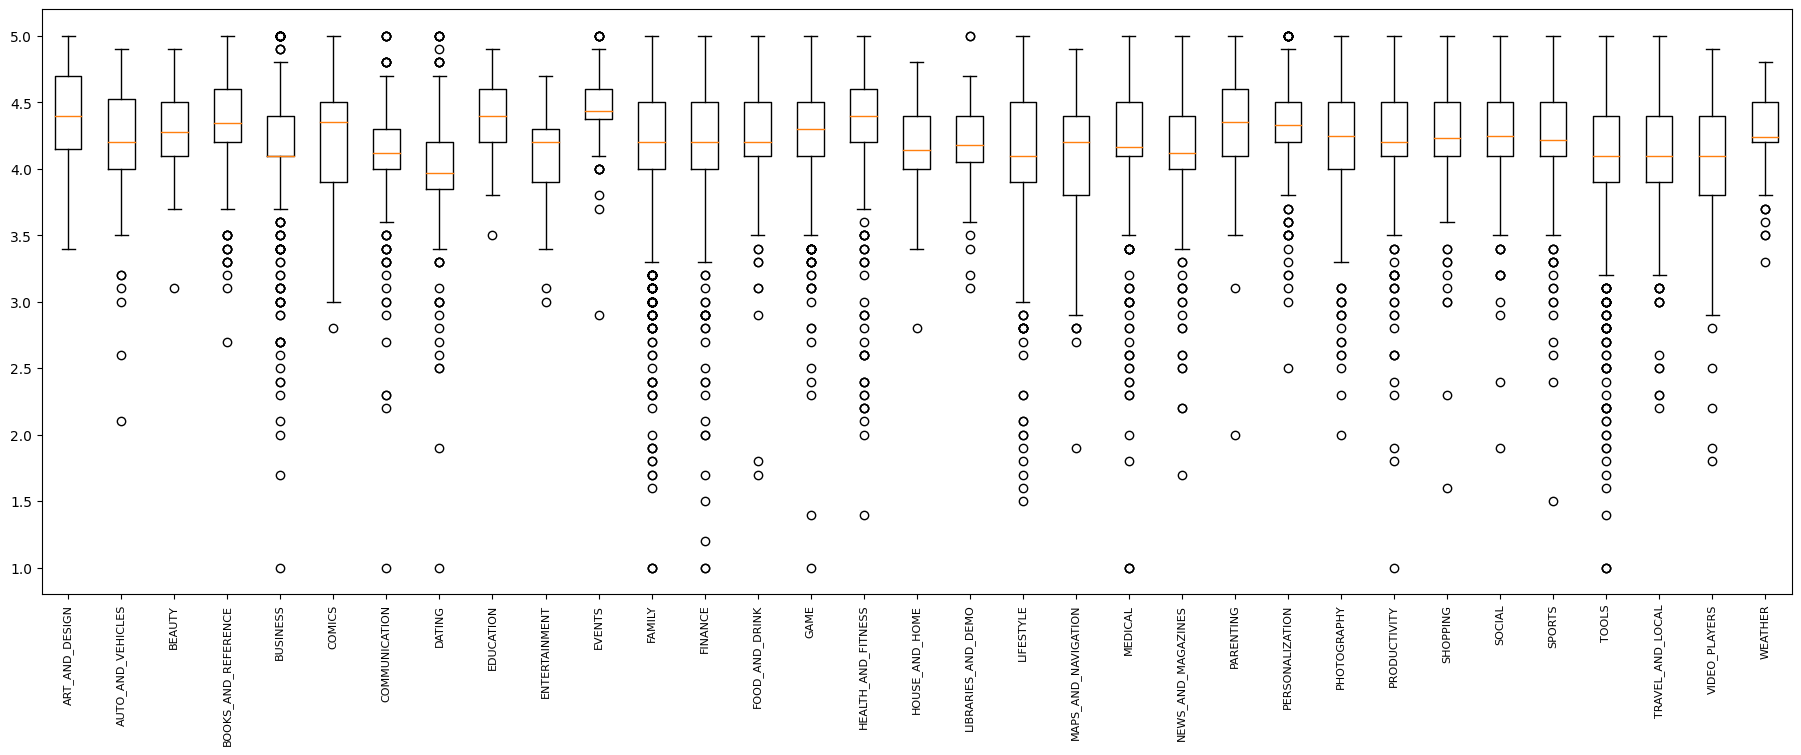

In [130]:
# boxplot of ratings by category
dict_cat_rating = df_clean.groupby('Category')['Rating'].apply(list).to_dict()
fig, ax1 = plt.subplots(figsize=(20, 9))
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
ax1.boxplot(dict_cat_rating.values())
ax1.set_xticklabels(dict_cat_rating.keys(),rotation=90, fontsize=8)

In [131]:
# calculate upper and lower cutoff of rating for each category
import numpy as np
dict_cat_rating_limits = {}
for col,values in dict_cat_rating.items():
    Q1 = np.quantile(values,0.25)
    Q3 = np.quantile(values,0.75)
    IQR = Q3 - Q1
    dict_cat_rating_limits[col] = [Q1 - 1.5*IQR,Q3 + 1.5*IQR]
dict_cat_rating_limits

{'ART_AND_DESIGN': [3.3250000000000006, 5.525],
 'AUTO_AND_VEHICLES': [3.2124999999999995, 5.312500000000001],
 'BEAUTY': [3.499999999999999, 5.1000000000000005],
 'BOOKS_AND_REFERENCE': [3.600000000000001, 5.199999999999999],
 'BUSINESS': [3.64619771863118, 4.852281368821293],
 'COMICS': [3.0, 5.4],
 'COMMUNICATION': [3.5500000000000003, 4.75],
 'DATING': [3.324999999999999, 4.725000000000001],
 'EDUCATION': [3.600000000000001, 5.199999999999999],
 'ENTERTAINMENT': [3.3, 4.8999999999999995],
 'EVENTS': [4.0375000000000005, 4.937499999999999],
 'FAMILY': [3.25, 5.25],
 'FINANCE': [3.25, 5.25],
 'FOOD_AND_DRINK': [3.499999999999999, 5.1000000000000005],
 'GAME': [3.499999999999999, 5.1000000000000005],
 'HEALTH_AND_FITNESS': [3.600000000000001, 5.199999999999999],
 'HOUSE_AND_HOME': [3.3999999999999995, 5.000000000000001],
 'LIBRARIES_AND_DEMO': [3.524999999999999, 4.925000000000001],
 'LIFESTYLE': [3.0, 5.4],
 'MAPS_AND_NAVIGATION': [2.899999999999999, 5.300000000000001],
 'MEDICAL': [

In [132]:
# Remove outliers in ratings from each category
df_inlier_list = []
rows_dropped = 0
for cat in dict_cat_rating_limits.keys():
    print(cat)
    df_cat = df_clean.loc[df_clean['Category']==cat]
    df_inlier = df_cat.loc[(df_cat['Rating']>dict_cat_rating_limits[cat][0]) & (df_cat['Rating']<dict_cat_rating_limits[cat][1])]
    # add the cleaned dataframe to list
    df_inlier_list.append(df_inlier)
    rows_dropped = rows_dropped+(df_cat.shape[0]-df_inlier.shape[0])
    print((df_cat.shape[0]-df_inlier.shape[0]))
print("Total rows dropped: "+ str(rows_dropped))

ART_AND_DESIGN
0
AUTO_AND_VEHICLES
6
BEAUTY
1
BOOKS_AND_REFERENCE
16
BUSINESS
72
COMICS
2
COMMUNICATION
34
DATING
29
EDUCATION
1
ENTERTAINMENT
2
EVENTS
14
FAMILY
91
FINANCE
26
FOOD_AND_DRINK
9
GAME
32
HEALTH_AND_FITNESS
34
HOUSE_AND_HOME
1
LIBRARIES_AND_DEMO
6
LIFESTYLE
29
MAPS_AND_NAVIGATION
5
MEDICAL
34
NEWS_AND_MAGAZINES
18
PARENTING
2
PERSONALIZATION
29
PHOTOGRAPHY
17
PRODUCTIVITY
25
SHOPPING
10
SOCIAL
12
SPORTS
17
TOOLS
61
TRAVEL_AND_LOCAL
15
VIDEO_PLAYERS
5
WEATHER
7
Total rows dropped: 662


In [133]:
## concat all dataframes along rows after removing outliers from each category
df_clean_inliers = pd.concat(df_inlier_list, axis=0)
print(df_clean_inliers.shape[0])

8884


In [134]:
# check rows dropped [alterative approach is to cap the outliers with max or min value]
print(df_clean.shape[0]-df_clean_inliers.shape[0])

662


##### Exercise 5: Plot the barplot of all the categories indicating no. of installs

In [135]:
s = "500,000+"
char_remov = [',','+']
for char in char_remov:
    # replace() "returns" an altered string
    s = s.replace(char, "")
s

'500000'

In [136]:
# function to replace commas and + from Installs column
def clean_installs(s):
    char_remov = [',','+']
    for char in char_remov:
        s = s.replace(char, "")
    return float(s)

In [137]:
# replace size with converted values
df_clean_inliers['Installs'] = df_clean_inliers['Installs'].apply(clean_installs)
df_clean_inliers['Installs'].head(5)

19      10000000.0
4749      100000.0
4755        5000.0
4759       10000.0
4764        1000.0
Name: Installs, dtype: float64

In [138]:
# calculate no.of installs by category
df_groups = df_clean_inliers.groupby(['Category'])['Installs'].sum().reset_index(name='sum').sort_values(['sum'], ascending=False)
df_groups.head(5)

,Category,sum
14,GAME,1.304283e+10
6,COMMUNICATION,1.103467e+10
29,TOOLS,7.921629e+09
11,FAMILY,6.179663e+09
25,PRODUCTIVITY,5.776176e+09


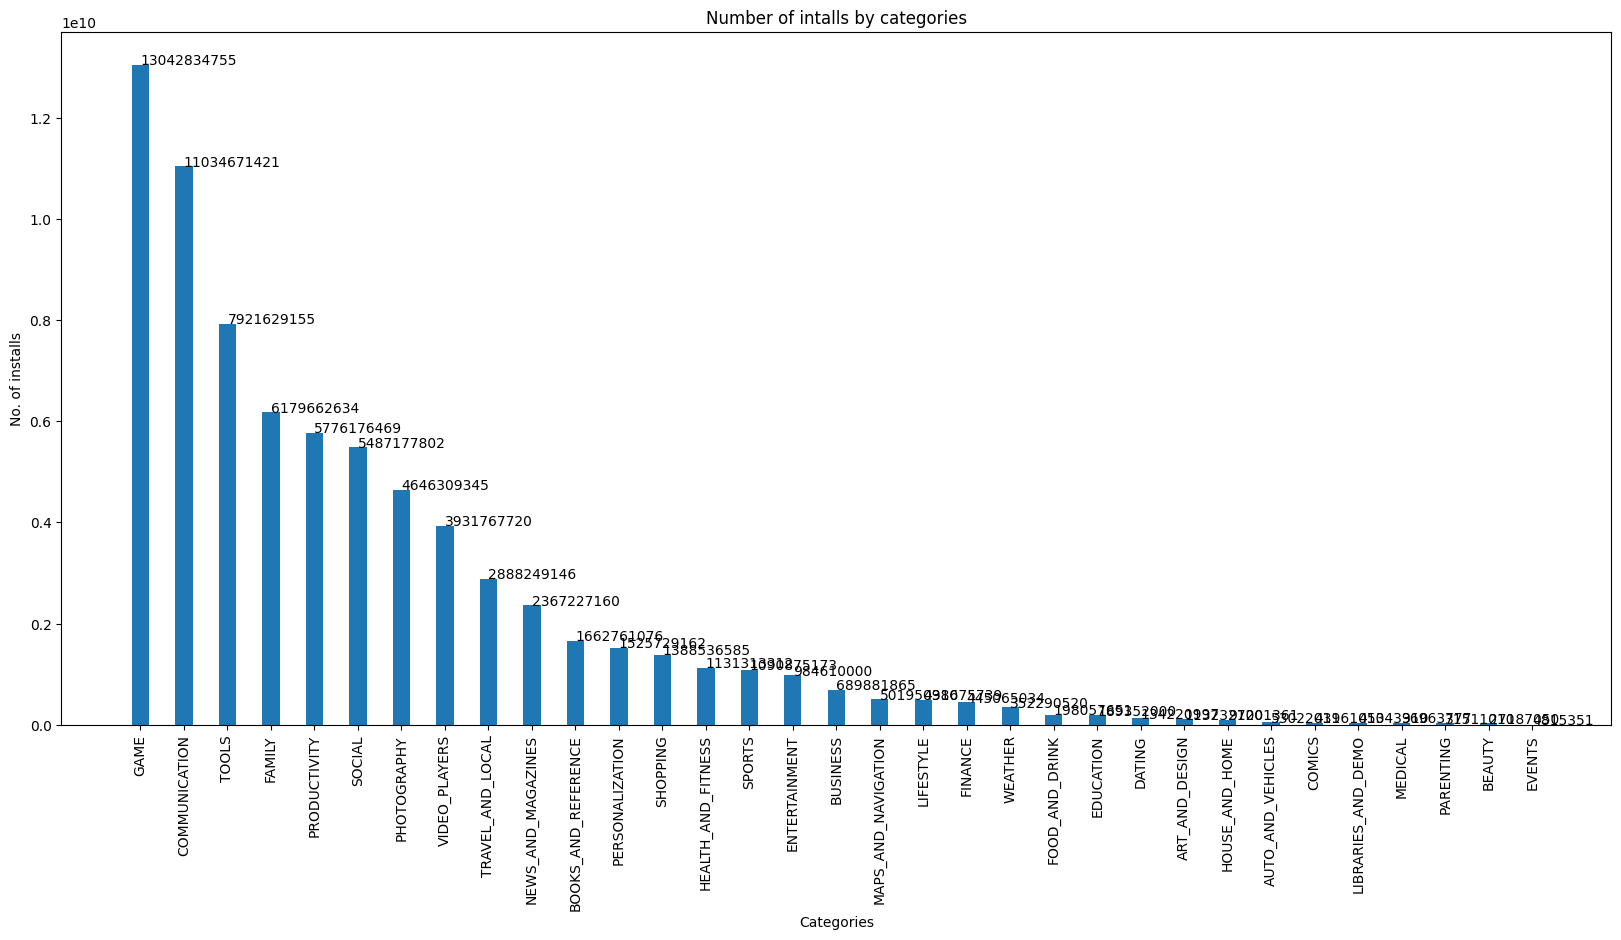

In [139]:
# create x and y axis values
categories_3 =list(df_groups['Category'])
install_counts = [int(x) for x in list(df_groups['sum'])]
#install_counts_labels = [ str(f'{int(x):,}')+"+" for x in install_counts ]
# creating the bar plot
fig = plt.figure(figsize = (20,9))
plt.bar(categories_3, install_counts,width = 0.4)
addlabels(categories_3, install_counts)
plt.xlabel("Categories")
plt.ylabel("No. of installs")
plt.title("Number of intalls by categories")
plt.xticks(rotation=90)
plt.show()

In [140]:
df_groups[df_groups['Category']=='SPORTS']

,Category,sum
28,SPORTS,1.090875e+09


In [141]:
df_sports_install = df_clean_inliers[df_clean_inliers['Category'] == 'SPORTS'].groupby('Installs').size().reset_index()
df_sports_install

,Installs,0
0,1.0,3
1,5.0,8
2,10.0,18
3,50.0,7
4,100.0,21
5,500.0,9
6,1000.0,18
7,5000.0,10
8,10000.0,30
9,50000.0,12


In [142]:
df_sports_install['total'] = df_sports_install['Installs']* df_sports_install[0]
df_sports_install['total'].sum()

1090875173.0

## Insights


### Task 3: Derive the below insights

##### Exercise 1: Does the price correlate with the size of the app?

  **Hint:** plot the scatterplot of `Size` and `Price`

In [143]:
def clean_price(s):
    return float(s.replace("$",""))

In [144]:
# replace $ in price
df_clean_inliers['Price'] = df_clean_inliers['Price'].apply(clean_price)

In [145]:
# check rows with text value in size
df_clean_inliers[df_clean_inliers['Size']=='VARIES WITH DEVICE'].shape[0]

1182

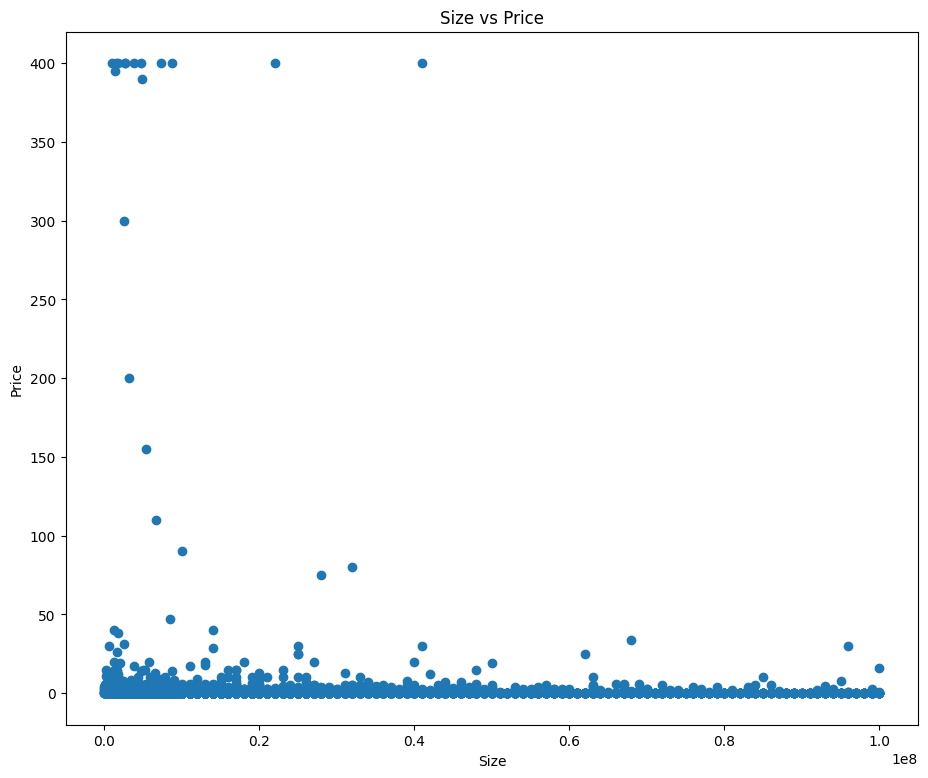

In [146]:
# filter out text values in size
df_scatter = df_clean_inliers[df_clean_inliers['Size']!='VARIES WITH DEVICE']
# plot size vs price
fig = plt.figure(figsize = (11,9))
plt.scatter(df_scatter['Size'],df_scatter['Price'])
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Size vs Price")
plt.show()

##### Exercise 2: Find the popular app categories based on rating and no. of installs

**Hint:** [df.groupby.agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html); Taking the average rating could be another approach



In [147]:
# take avg rating and num of installs
df_app_popularity = df_clean_inliers.groupby(['Category']).agg({'Rating':'mean','Installs':'sum'}).reset_index()
df_app_popularity.head(5)

,Category,Rating,Installs
0,ART_AND_DESIGN,4.378282,1.132321e+08
1,AUTO_AND_VEHICLES,4.292237,5.302201e+07
2,BEAUTY,4.301236,2.718705e+07
3,BOOKS_AND_REFERENCE,4.425518,1.662761e+09
4,BUSINESS,4.206824,6.898819e+08


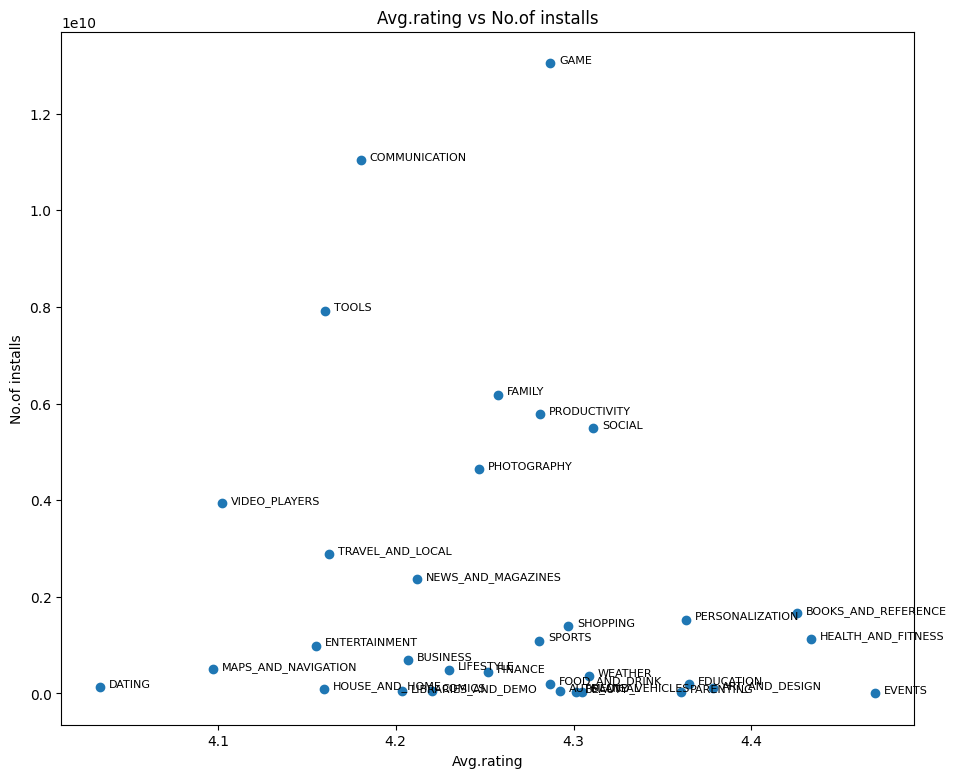

In [148]:
# plot size vs price
fig = plt.figure(figsize = (11,9))
plt.scatter(df_app_popularity['Rating'],df_app_popularity['Installs'])
# Annotate label points
for i, category in enumerate(df_app_popularity['Category']):
    plt.text(df_app_popularity['Rating'][i]+0.005, df_app_popularity['Installs'][i]+0.005,category,fontsize=8)
plt.xlabel("Avg.rating")
plt.ylabel("No.of installs")
plt.title("Avg.rating vs No.of installs")
plt.show()

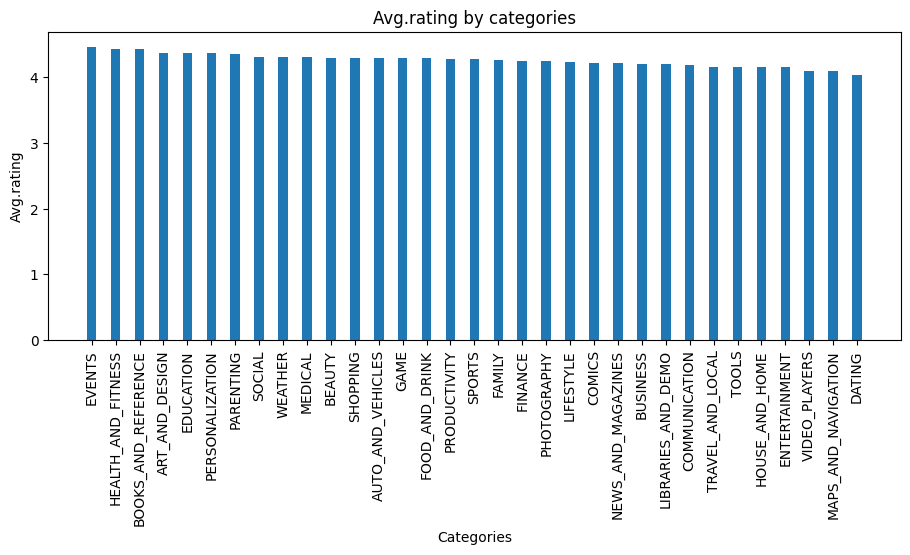

In [149]:
# sort dataframe on rating
df_app_popularity = df_app_popularity.sort_values(by='Rating', ascending=False)
# create x and y axis values
categories_4 =list(df_app_popularity['Category'])
avg_rating = list(df_app_popularity['Rating'])
# creating the bar plot
fig = plt.figure(figsize = (11,4))
plt.bar(categories_4,avg_rating,width = 0.4)
#addlabels(categories_4, avg_rating)
plt.xlabel("Categories")
plt.ylabel("Avg.rating")
plt.title("Avg.rating by categories")
plt.xticks(rotation=90)
plt.show()

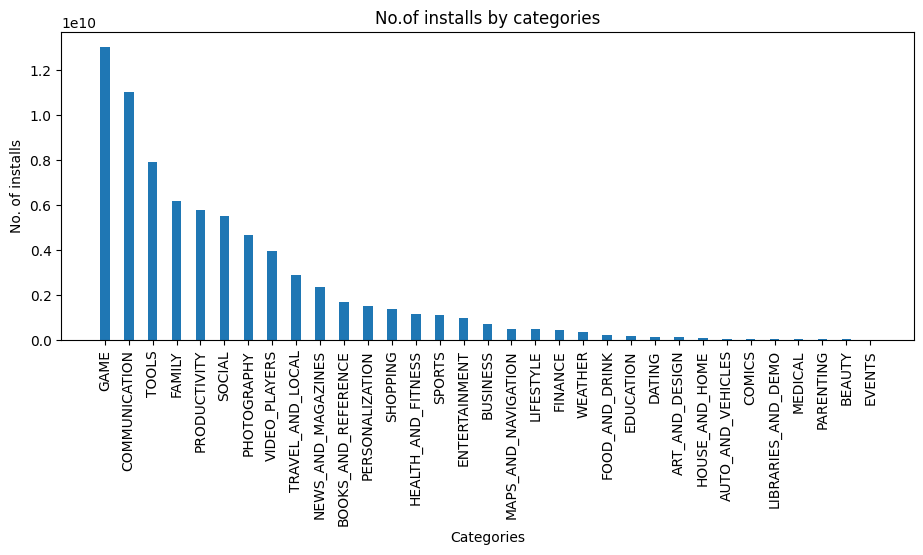

In [150]:
# sort the dataframe on no. of installs
df_app_popularity = df_app_popularity.sort_values(by='Installs', ascending=False)
# create x and y axis values
categories_5 =list(df_app_popularity['Category'])
num_of_installs = list(df_app_popularity['Installs'])
#install_counts_labels = [ str(f'{int(x):,}')+"+" for x in install_counts ]
# creating the bar plot
fig = plt.figure(figsize = (11,4))
plt.bar(categories_5, num_of_installs,width = 0.4)
#addlabels(categories_4, avg_rating)
plt.xlabel("Categories")
plt.ylabel("No. of installs")
plt.title("No.of installs by categories")
plt.xticks(rotation=90)
plt.show()

##### Exercise 3: How many apps are produced in each year category-wise ?

  * Create a `Year` column by slicing the values of `Last Updated` column and find the Year with most no. of apps produced

    **For example**, slice the year `2017` from `February 8, 2017`

  * Find the categories which have a consistent rating in each year

      **Hint:** `sns.countplot`

In [151]:
# create year column
df_clean_inliers['Year'] = df_clean_inliers['Last Updated'].str[-4:]

In [152]:
# find the Year with most no. of apps produced
df_clean_inliers.groupby('Year')['App'].count()

Year
2010       1
2011      14
2012      21
2013      95
2014     179
2015     414
2016     701
2017    1608
2018    5851
Name: App, dtype: int64

In [153]:
# take avg. rating by year
df_cat_rating_yearly = df_clean_inliers.groupby(['Category','Year']).agg({'Rating':'mean'}).reset_index()
df_cat_rating_yearly.head(10)

,Category,Year,Rating
0,ART_AND_DESIGN,2017,4.446610
1,ART_AND_DESIGN,2018,4.360837
2,AUTO_AND_VEHICLES,2014,4.000000
3,AUTO_AND_VEHICLES,2016,4.100000
4,AUTO_AND_VEHICLES,2017,4.411546
5,AUTO_AND_VEHICLES,2018,4.292742
6,BEAUTY,2016,3.900000
7,BEAUTY,2017,4.326190
8,BEAUTY,2018,4.303846
9,BOOKS_AND_REFERENCE,2011,4.100000


In [154]:
# get std of rating across years
df_cat_rating_yearly_std = df_cat_rating_yearly.groupby(['Category']).agg({'Rating':'std'}).reset_index()
df_cat_rating_yearly_std.rename(columns = {'Rating':'yearly_rating_std'}, inplace = True)
df_cat_rating_yearly_std.head(10)

,Category,yearly_rating_std
0,ART_AND_DESIGN,0.060651
1,AUTO_AND_VEHICLES,0.185605
2,BEAUTY,0.239871
3,BOOKS_AND_REFERENCE,0.127235
4,BUSINESS,0.138766
5,COMICS,0.115949
6,COMMUNICATION,0.066360
7,DATING,0.176334
8,EDUCATION,0.163654
9,ENTERTAINMENT,0.406827


In [155]:
# Pivot yearly by category
pivot_cat_rating_year = pd.pivot_table(df_cat_rating_yearly, values="Rating", index=["Category"], columns=["Year"]).reset_index()
pivot_cat_rating_year['rating_years'] = 9 - pivot_cat_rating_year.isna().sum(axis = 1)
# left join yearly rating std with the pivot
pivot_cat_rating_year = pivot_cat_rating_year.merge(df_cat_rating_yearly_std, on='Category', how='left')
# sort on no. of rating years and rating std across years to get apps with consistent rating
pivot_cat_rating_year.sort_values(['rating_years', 'yearly_rating_std'], ascending=[False, True])

,Category,2010,2011,2012,2013,2014,2015,2016,2017,2018,rating_years,yearly_rating_std
11,FAMILY,4.2,3.60,4.091763,4.277803,4.165294,4.129812,4.189066,4.224327,4.299939,9,0.209646
14,GAME,NaN,4.05,4.300000,4.228650,4.128000,4.217018,4.174461,4.239408,4.332506,8,0.090982
29,TOOLS,NaN,4.15,4.333333,4.080000,4.014779,4.116433,4.006762,4.088485,4.220566,8,0.108699
6,COMMUNICATION,NaN,NaN,4.121484,4.207161,4.188783,4.026343,4.165371,4.111048,4.211952,7,0.066360
25,PRODUCTIVITY,NaN,NaN,4.200000,4.070847,4.225951,4.107029,4.311672,4.213774,4.317202,7,0.093172
20,MEDICAL,NaN,NaN,4.033333,4.327759,4.284828,4.211897,4.202047,4.291105,4.323814,7,0.103509
3,BOOKS_AND_REFERENCE,NaN,4.10,NaN,4.263314,4.353320,4.419984,4.446869,4.420572,4.438619,7,0.127235
17,LIBRARIES_AND_DEMO,NaN,3.80,NaN,3.800000,4.200000,3.900000,4.122396,4.147151,4.322656,7,0.207583
18,LIFESTYLE,NaN,3.80,NaN,3.950000,4.332226,3.963924,4.320192,4.268404,4.223214,7,0.213466
23,PERSONALIZATION,NaN,NaN,NaN,4.244351,4.368750,4.242857,4.328152,4.375732,4.390927,6,0.066477


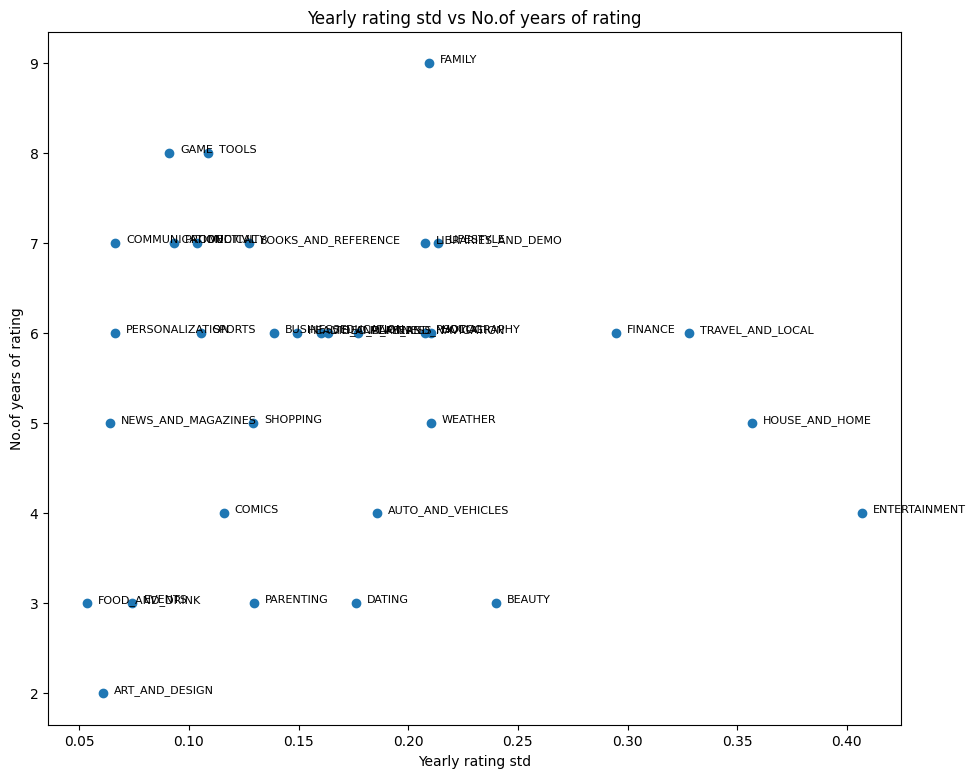

In [156]:
# plot yearly rating std vs no.of years of rating
fig = plt.figure(figsize = (11,9))
plt.scatter(pivot_cat_rating_year['yearly_rating_std'],pivot_cat_rating_year['rating_years'])
# Annotate label points
for i, category in enumerate(pivot_cat_rating_year['Category']):
    plt.text(pivot_cat_rating_year['yearly_rating_std'][i]+0.005, pivot_cat_rating_year['rating_years'][i]+0.005,category,fontsize=8)
plt.xlabel("Yearly rating std")
plt.ylabel("No.of years of rating")
plt.title("Yearly rating std vs No.of years of rating")
plt.show()

##### Exercise 4: Identify the highest paid apps with a good rating



In [157]:
# Filter for only paid apps
df_paid_apps = df_clean_inliers[df_clean_inliers['Type']=='Paid']

In [158]:
# Show top 10 highest paid apps with good rating (rating > 4)
df_paid_apps[df_paid_apps['Rating']>4.5].sort_values(['Price', 'Rating'], ascending=[False, False]).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_Rating_Avg,non_en_char_perc,Year
5362,I Am Rich Pro,FAMILY,4.400000,201,2700000.0,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,4.183525,0.0,2017
4197,most expensive app (H),FAMILY,4.300000,6,1500000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,4.183525,0.0,2018
5369,I am Rich,FINANCE,4.300000,180,3800000.0,5000.0,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,4.115563,0.0,2018
5364,I am rich (Most expensive app),FINANCE,4.100000,129,2700000.0,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,4.115563,0.0,2017
5356,I Am Rich Premium,FINANCE,4.100000,1867,4700000.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4.115563,0.0,2017
9917,Eu Sou Rico,FINANCE,4.115563,0,1400000.0,0.0,Paid,394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up,4.115563,0.0,2018
9719,EP Cook Book,MEDICAL,4.166552,0,3200000.0,0.0,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,4.166552,0.0,2015
6692,cronometra-br,PRODUCTIVITY,4.183389,0,5400000.0,0.0,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up,4.183389,0.0,2017
6624,BP Fitness Lead Scanner,EVENTS,4.435556,0,6700000.0,1.0,Paid,109.99,Everyone,Events,"August 23, 2017",0.0.1,4.1 and up,4.435556,0.0,2017
9730,Lean EQ,BUSINESS,4.098479,6,10000000.0,10.0,Paid,89.99,Everyone,Business,"February 14, 2017",1.0,4.1 and up,4.098479,0.0,2017


##### Exercise 5: Are the top-rated apps genuine ? How about checking reviews count of top-rated apps ?

In [159]:
# show apps with top rating but low reviews
df_clean_inliers.sort_values(['Rating','Reviews'], ascending=[False, True]).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_Rating_Avg,non_en_char_perc,Year
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2900000.0,100.0,Free,0.00,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up,4.359322,0.0,2018
5482,meStudying: AP English Lit,FAMILY,5.0,1,655000.0,10.0,Paid,4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,4.183525,0.0,2013
5509,Wowkwis aq Ka'qaquj,FAMILY,5.0,1,49000000.0,10.0,Free,0.00,Everyone,Education;Education,"February 16, 2018",1.0,4.0.3 and up,4.183525,0.0,2018
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40000000.0,10.0,Paid,19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up,4.183525,0.0,2014
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27000000.0,100.0,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,4.183525,0.0,2018
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63000000.0,10.0,Paid,4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up,4.183525,0.0,2018
8955,DV ASSIST,FAMILY,5.0,1,18000000.0,100.0,Free,0.00,Everyone,Education,"August 2, 2018",1.0,4.4 and up,4.183525,0.0,2018
8596,DN Employee,FAMILY,5.0,1,3800000.0,10.0,Free,0.00,Everyone,Education,"June 25, 2018",1.4,4.4 and up,4.183525,0.0,2018
8411,DH-UFO,FAMILY,5.0,1,59000000.0,100.0,Free,0.00,Everyone,Entertainment,"May 24, 2018",1.0.9,4.4 and up,4.183525,0.0,2018
7623,CN Resident,FAMILY,5.0,1,64000000.0,100.0,Free,0.00,Everyone,Entertainment,"May 22, 2017",40.10,4.1 and up,4.183525,0.0,2017


##### Exercise 6: If the number of reviews of an app is very low, what could be the reason for its top-rating ?

In [182]:
# convert reviews to int
df_clean_inliers['Reviews'] = df_clean_inliers['Reviews'].astype(str).astype(int)

In [185]:
# filter for only top rated apps
df_top_rated_apps = df_clean_inliers[df_clean_inliers['Rating']>4.5]

In [186]:
# create bins for no. of reviews
bins = [0,10,50,100,500,1000,5000,10000,50000,1000000,5000000]
df_top_rated_apps['Review_bins'] = pd.cut(df_top_rated_apps['Reviews'],bins)

<ipython-input-186-82073a2d2afb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_rated_apps['Review_bins'] = pd.cut(df_top_rated_apps['Reviews'],bins)


In [194]:
# check distribution of reviews
df_top_rated_apps.groupby(['Review_bins']).agg({'App':'count'})

,App
Review_bins,
"(0, 10]",260
"(10, 50]",211
"(50, 100]",89
"(100, 500]",142
"(500, 1000]",68
"(1000, 5000]",161
"(5000, 10000]",85
"(10000, 50000]",208
"(50000, 1000000]",304


In [208]:
# create bins for no. of reviews
bins_install = [0,10,50,100,500,1000,5000,10000,50000,1000000,5000000,100000000,500000001]
df_top_rated_apps['Installs_bins'] = pd.cut(df_top_rated_apps['Installs'],bins_install)

<ipython-input-208-326aee73172f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_rated_apps['Installs_bins'] = pd.cut(df_top_rated_apps['Installs'],bins_install)


In [253]:
# crosstab by ratings and installs and type
crosstab = pd.crosstab([df_top_rated_apps["Rating"],df_top_rated_apps["Review_bins"],df_top_rated_apps["Type"]], df_top_rated_apps["Installs_bins"],values=df_top_rated_apps['App'], aggfunc='count', margins=True).reset_index()
crosstab.loc[crosstab['Rating']==5]

Installs_bins,Rating,Review_bins,Type,"(0, 10]","(10, 50]","(50, 100]","(100, 500]","(500, 1000]","(1000, 5000]","(5000, 10000]","(10000, 50000]","(50000, 1000000]","(1000000, 5000000]","(5000000, 100000000]","(100000000, 500000001]",All
80,5.0,"(0, 10]",Free,36,21,68,17,17,0,1,0,0,0,0,0,160.0
81,5.0,"(0, 10]",Paid,12,2,3,1,0,0,0,0,0,0,0,0,18.0
82,5.0,"(10, 50]",Free,2,3,15,5,10,2,0,0,0,0,0,0,37.0
83,5.0,"(10, 50]",Paid,0,0,3,0,0,0,0,0,0,0,0,0,3.0
84,5.0,"(50, 100]",Free,0,0,0,0,2,0,0,0,0,0,0,0,2.0
85,5.0,"(50, 100]",Paid,0,0,0,0,0,0,0,0,0,0,0,0,NaN
86,5.0,"(100, 500]",Free,0,0,0,0,1,0,0,0,0,0,0,0,1.0
87,5.0,"(100, 500]",Paid,0,0,0,0,0,0,0,0,0,0,0,0,NaN
88,5.0,"(500, 1000]",Free,0,0,0,0,0,0,0,0,0,0,0,0,NaN
89,5.0,"(500, 1000]",Paid,0,0,0,0,0,0,0,0,0,0,0,0,NaN


##### Exercise 7: What is the 95% confidence interval for the rating of apps in the Google Play Store?

<ipython-input-254-1370e264299e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean_inliers['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

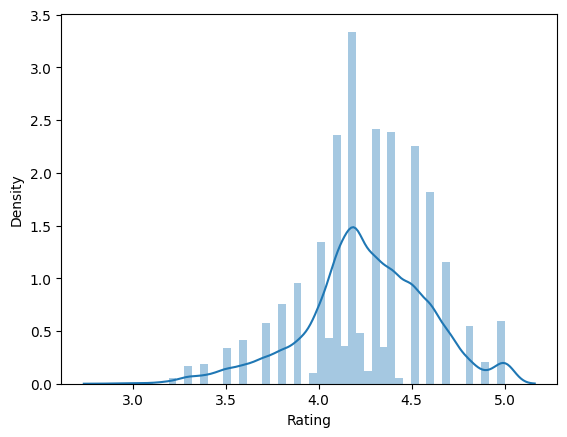

In [254]:
# plot pdf for rating
sns.distplot(df_clean_inliers['Rating'])

In [270]:
# upper bound
print(np.mean(df_clean_inliers['Rating'])+1.96*np.std(df_clean_inliers['Rating']))
# lower bound
print(np.mean(df_clean_inliers['Rating'])-1.96*np.std(df_clean_inliers['Rating']))

4.907565905312803
3.604162967588317


##### Exercise 8: Test if there is a statistically significant difference in the ratings between free and paid apps using a t-test

Steps:

* Set the null hypothesis and alternate hypothesis
* Separate the ratings of free and paid apps.
* Perform t-test: Use an independent samples t-test.
* Interpret results based on the p-value, decide whether to reject or fail to reject the null hypothesis.

In [ ]:
## H(o) = there is no difference between the ratings of paid and free apps
## H(Alt) = there is difference between the ratings of paid and free apps

<Axes: xlabel='Type', ylabel='Rating'>

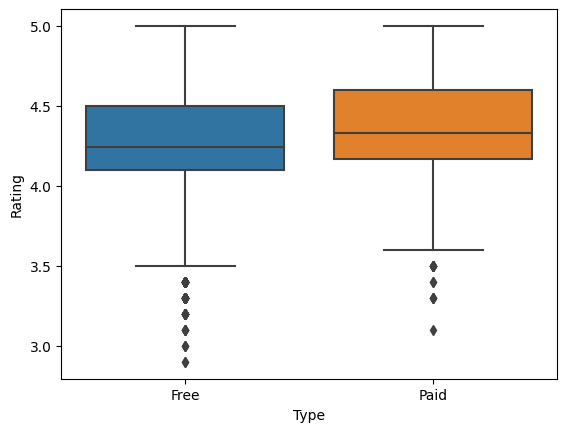

In [286]:
sns.boxplot(df_clean_inliers,x="Type",y='Rating')

In [280]:
print("Mean rating for paid apps: ", np.mean(df_clean_inliers['Rating'][df_clean_inliers['Type']=='Paid']))
print("Mean rating for free apps: ", np.mean(df_clean_inliers['Rating'][df_clean_inliers['Type']=='Free']))

Mean rating for paid apps:  4.3343083651077805
Mean rating for free apps:  4.249279587388071


In [290]:
# Perform t-test on data
from scipy import stats
from math import sqrt
from scipy.stats import t

# Run independent t-test
ind_t_test = stats.ttest_ind(df_clean_inliers['Rating'][df_clean_inliers['Type']=='Paid'], df_clean_inliers['Rating'][df_clean_inliers['Type']=='Free'])

# Calculate the mean difference and 95% confidence interval
N1 = df_clean_inliers['Rating'][df_clean_inliers['Type']=='Paid'].shape[0]
N2 = df_clean_inliers['Rating'][df_clean_inliers['Type']=='Free'].shape[0]
print(N1,N2)
df = (N1 + N2 - 2)
std1 = df_clean_inliers['Rating'][df_clean_inliers['Type']=='Paid'].std()
std2 = df_clean_inliers['Rating'][df_clean_inliers['Type']=='Free'].std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df)

diff_mean = df_clean_inliers['Rating'][df_clean_inliers['Type']=='Paid'].mean() - df_clean_inliers['Rating'][df_clean_inliers['Type']=='Free'].mean()
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

688 8196
The results of the independent t-test are: 
	t-value = 6.457
	p-value = 0.000

The difference between groups is 0.1 [0.1 to 0.1] (mean [95% CI])
